# Mounted my google drive

In [ ]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
from keras.layers import Dropout
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the dataset named customer_churn


In [ ]:
customer_churn=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the dataset


In [ ]:
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Identify the columns in the dataset

In [ ]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Create a list of columns with more than 30% missing values

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (customer_churn.isnull().sum() / len(customer_churn)) * 100
# Identify columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index

# Drop the identified columns from the DataFrame
customer_churn.drop(columns=columns_to_drop, inplace=True)



# Dropping the customerID

In [ ]:
customer_churn.drop('customerID', axis = 1, inplace = True)

In [ ]:
customer_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Change Total Charges to numeric


In [ ]:

#customer_churn_copy = customer_churn.copy()
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')


# Checking for missing values

In [ ]:
customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Fill in missing values

In [ ]:
customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].mean(), inplace=True)


Check for missing values again

In [ ]:
customer_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Identify  the numeric columns

In [ ]:

numeric_columns = customer_churn.select_dtypes(include=['number'])
numeric_columns


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


# Identify the textual columns

In [ ]:
text_columns= customer_churn.select_dtypes(include=['object'])
text_columns

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
# Creating a LabelEncoder instance
label_encoder = LabelEncoder()
# Iterating through the textual columns and encode them
for column in text_columns:
    customer_churn[column] = label_encoder.fit_transform(customer_churn[column])

In [ ]:
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Checking the correlation of each feature

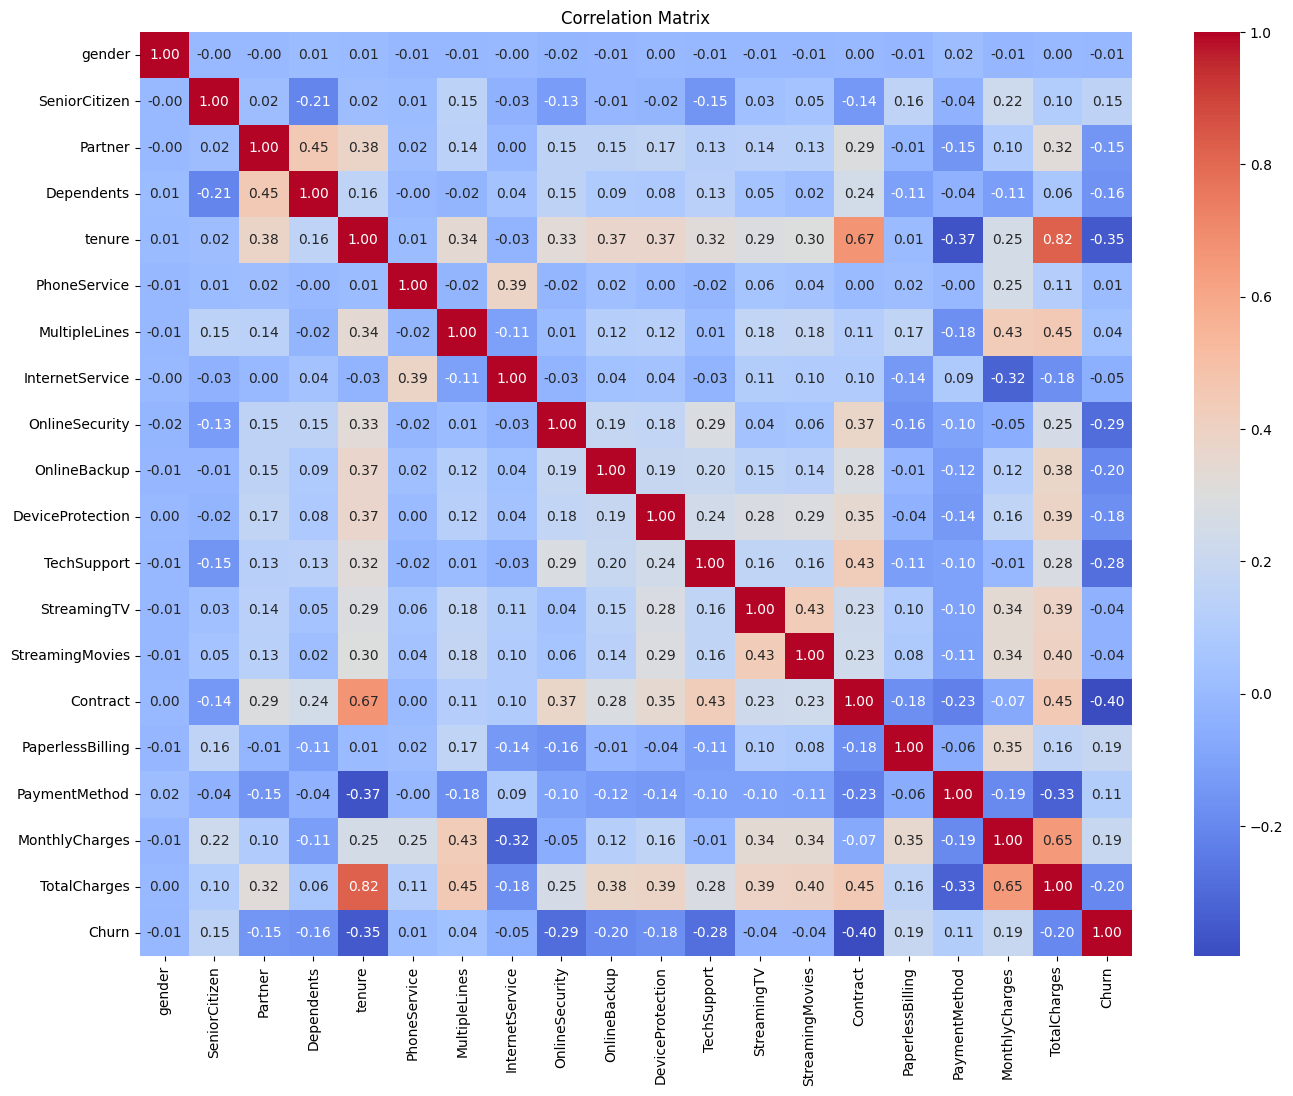

In [ ]:
correlation_matrix = customer_churn.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Setting the correlation limit and Filtering features based on the correlation limit

In [ ]:

correlation_limit = 0.03

target_correlation = correlation_matrix['Churn']

selected_features = target_correlation[abs(target_correlation) > correlation_limit].index

selected_features


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

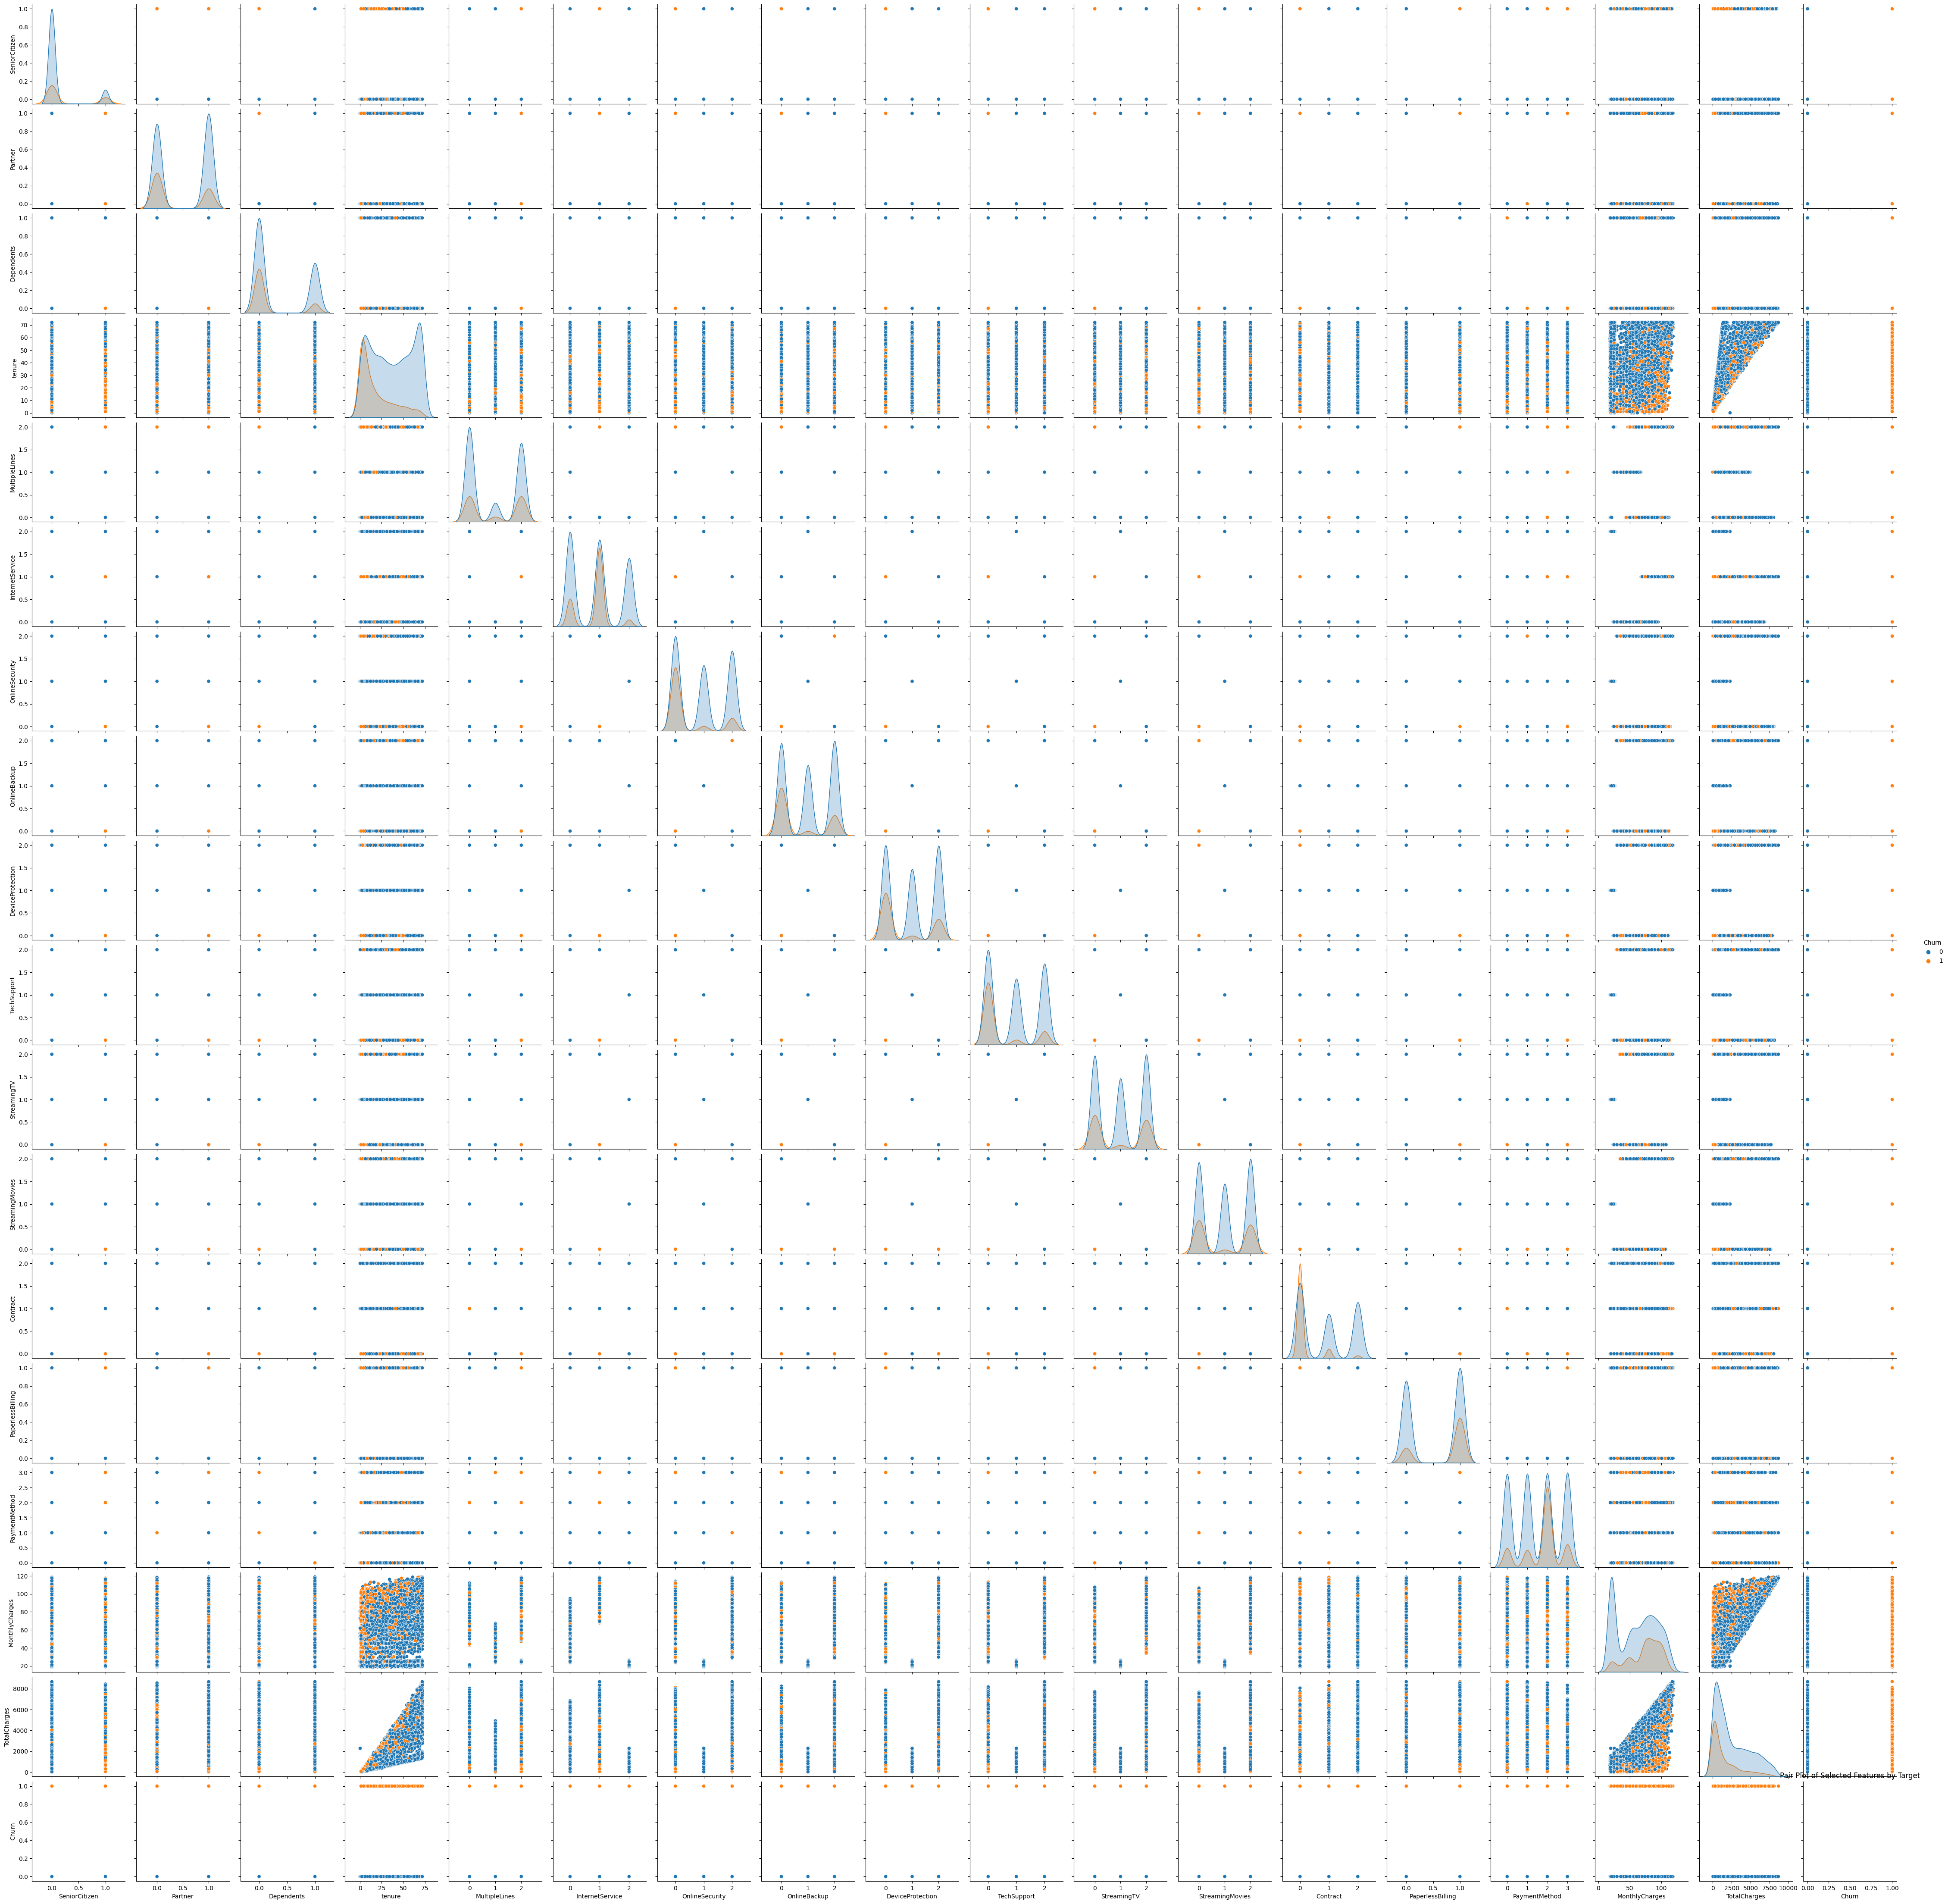

In [ ]:
sns.pairplot(data=customer_churn, vars=selected_features, hue='Churn')
plt.title('Pair Plot of Selected Features by Target')
plt.show()


# Visualization of  selected features

---



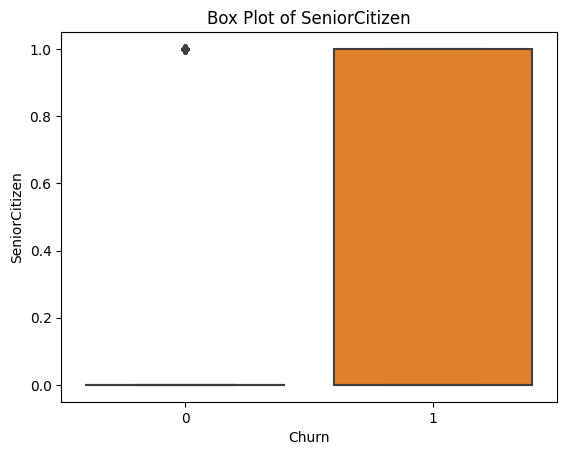

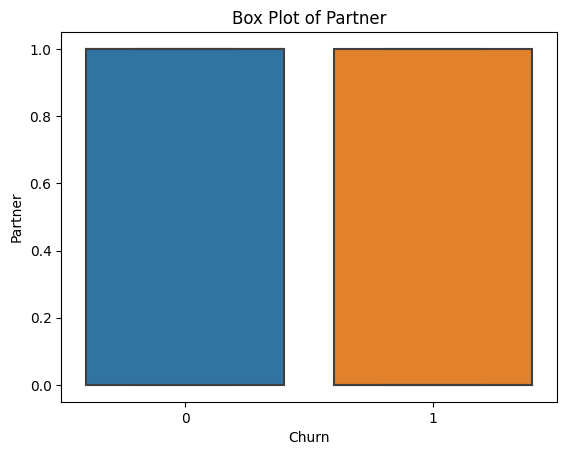

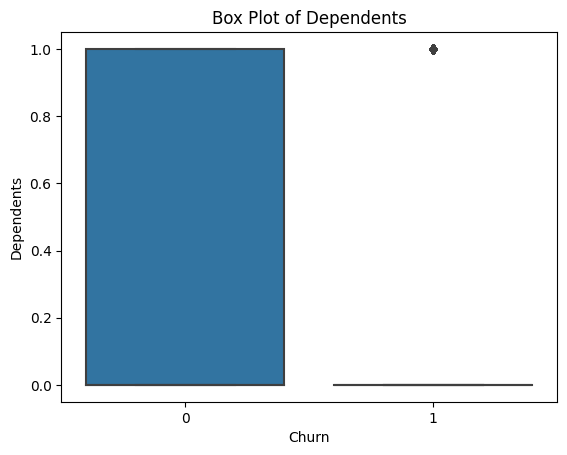

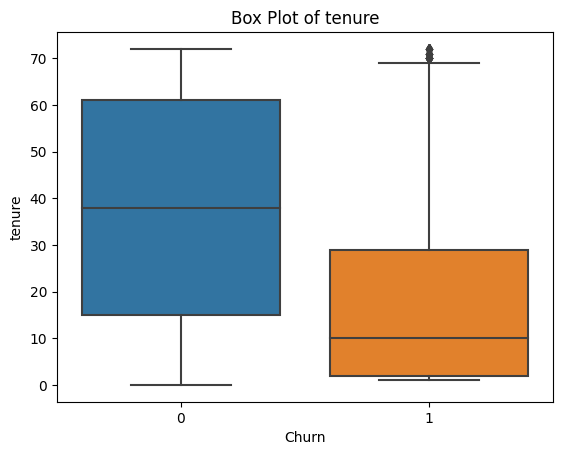

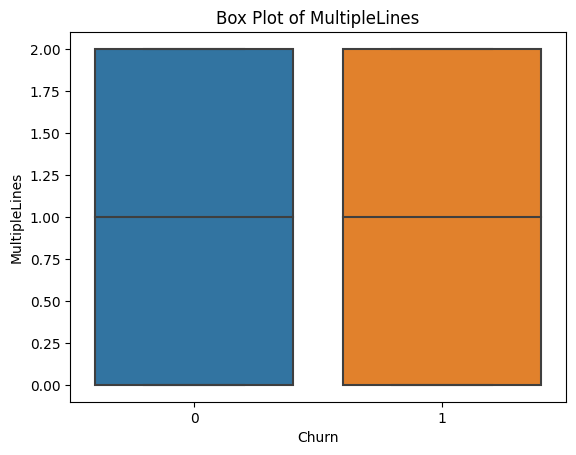

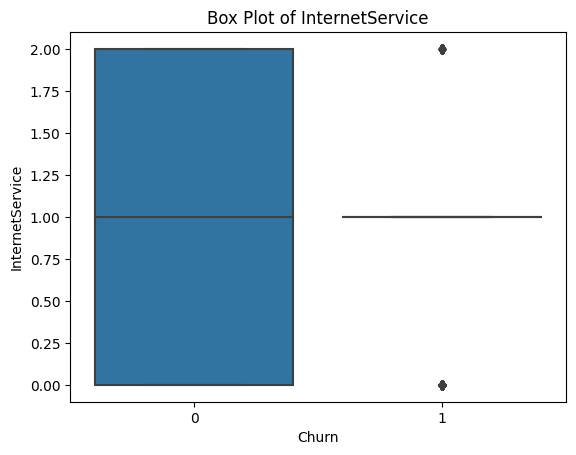

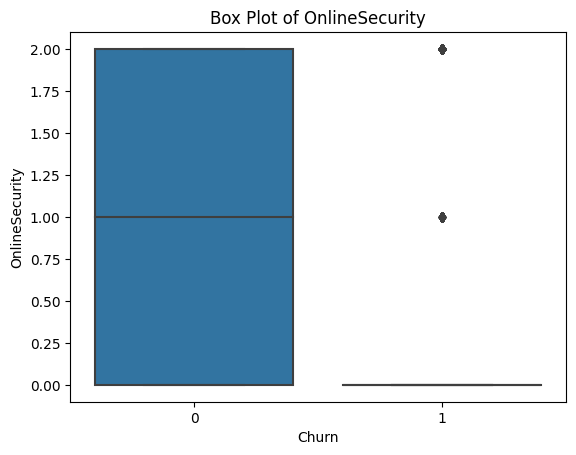

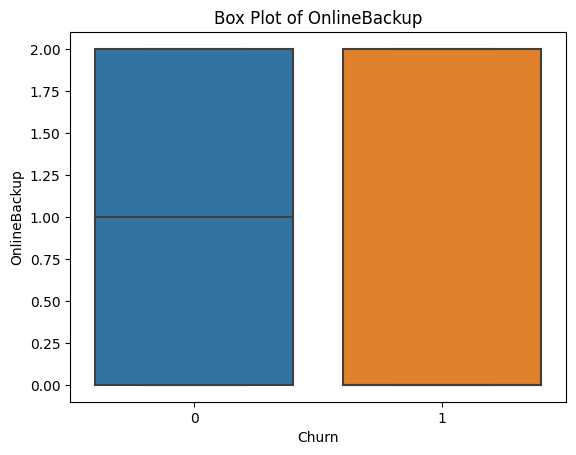

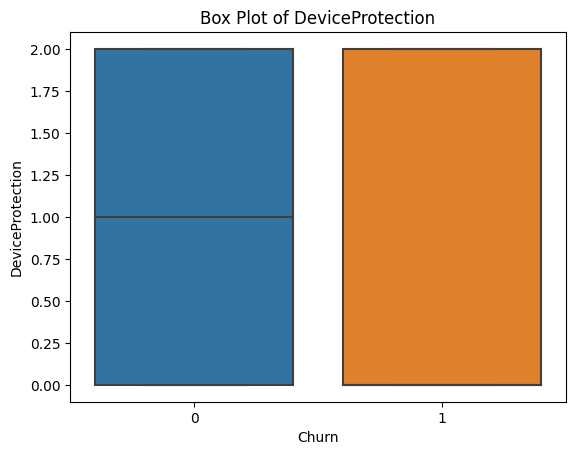

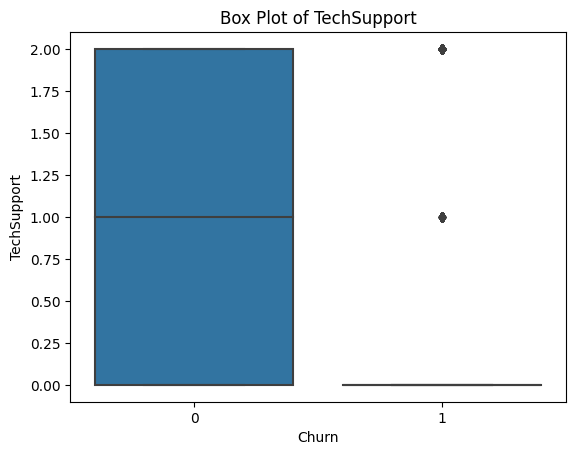

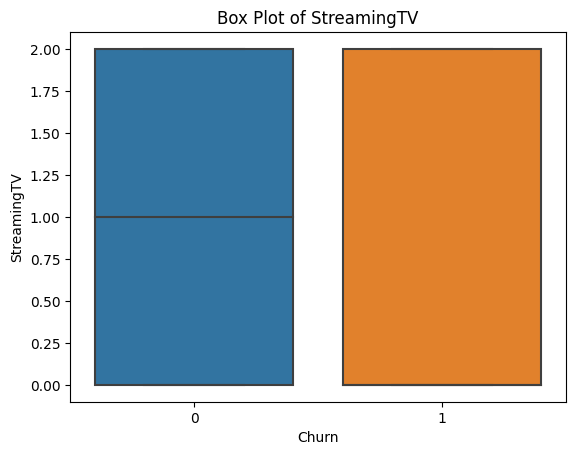

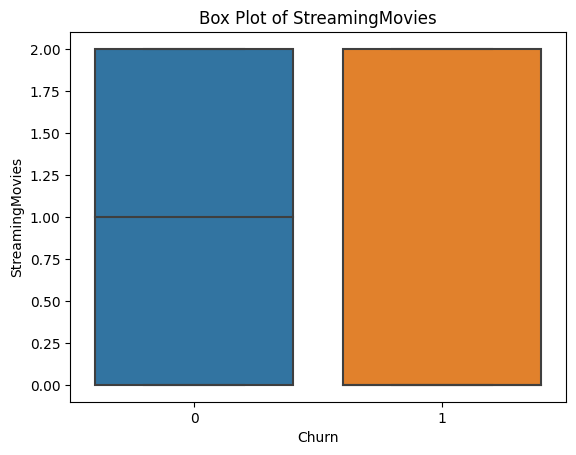

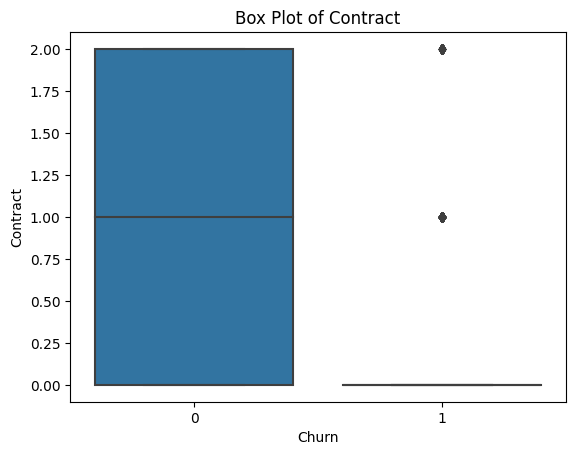

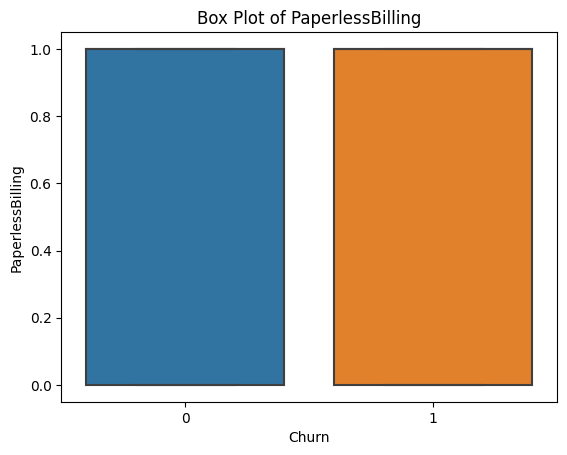

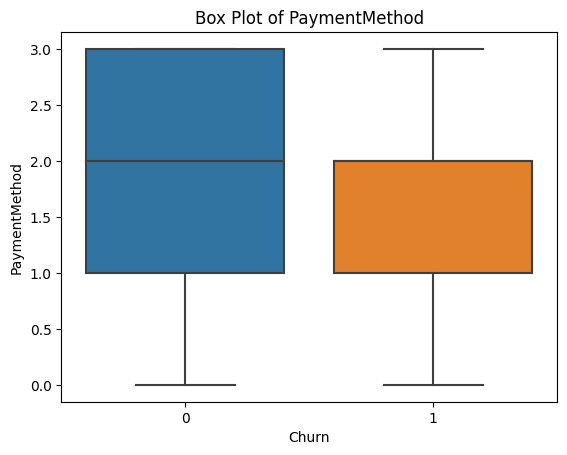

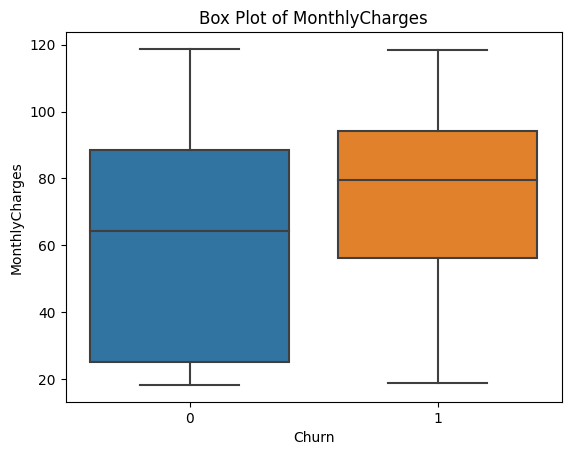

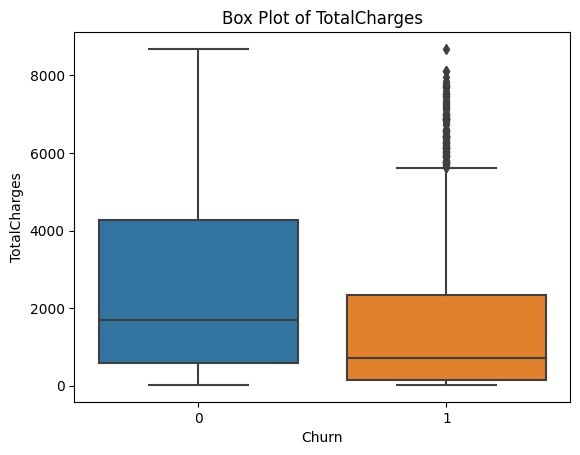

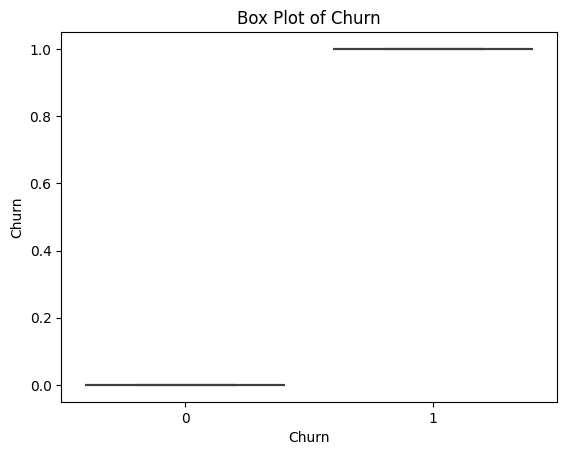

In [ ]:
for feature in selected_features:
    sns.boxplot(data=customer_churn, x='Churn', y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()


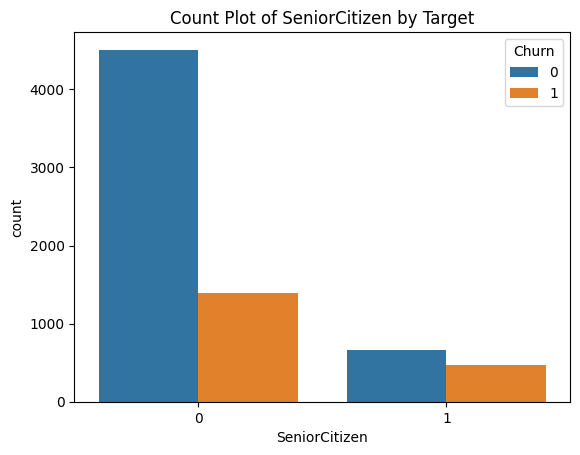

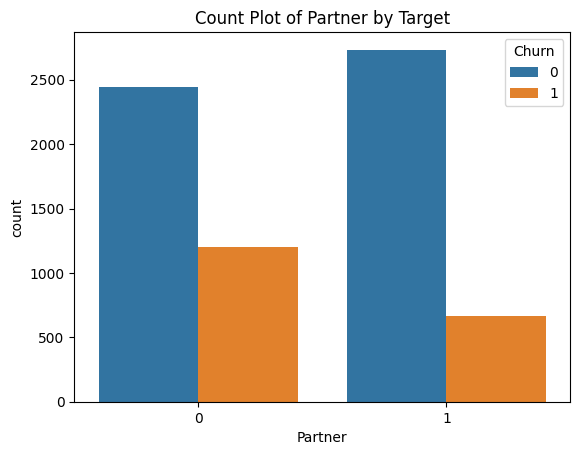

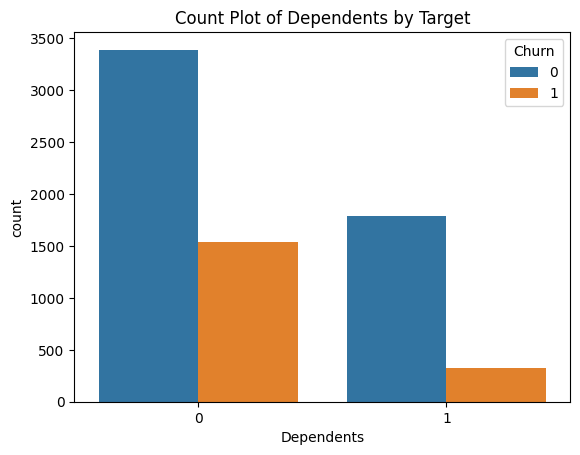

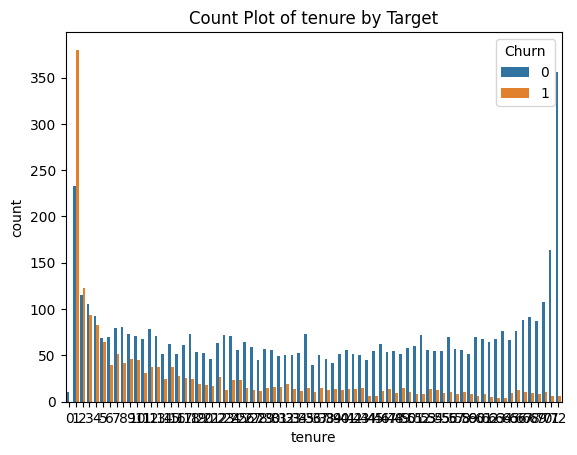

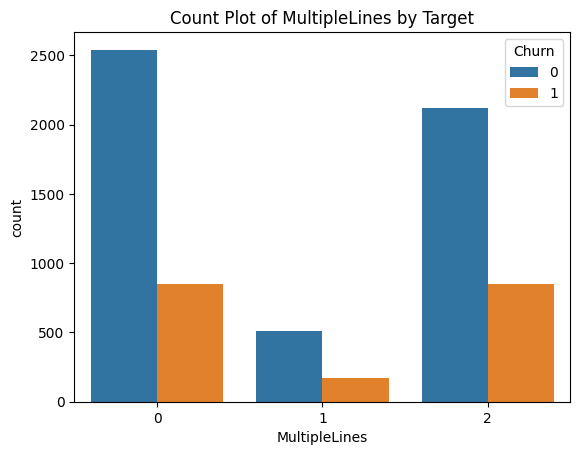

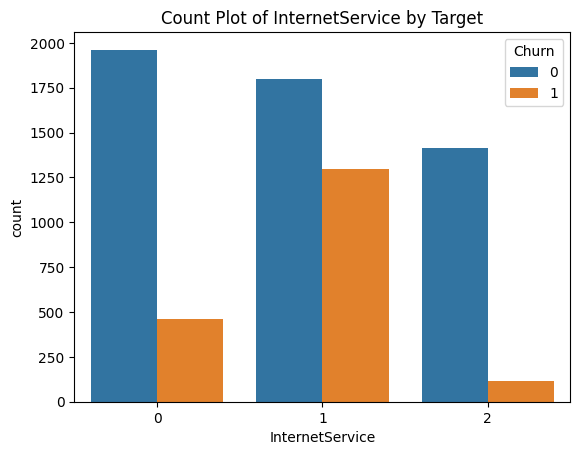

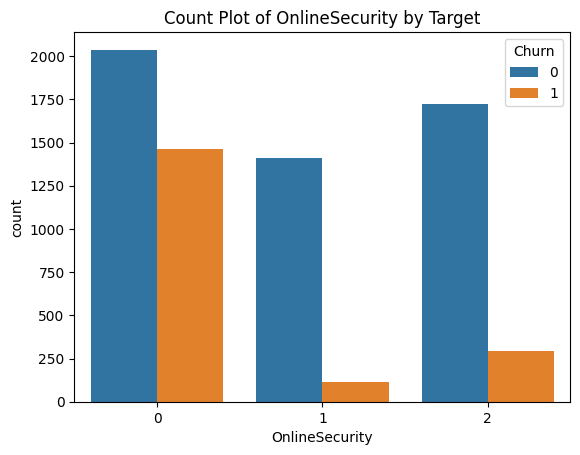

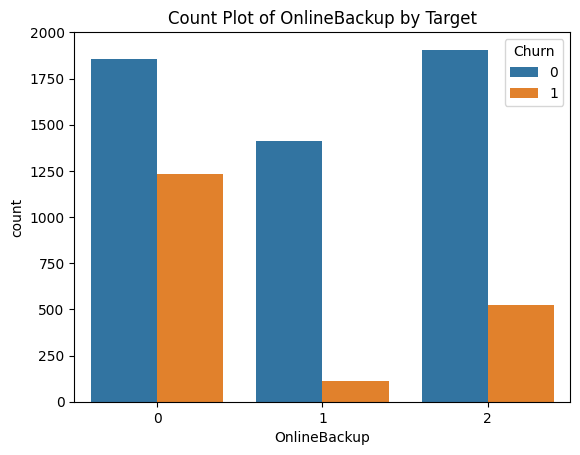

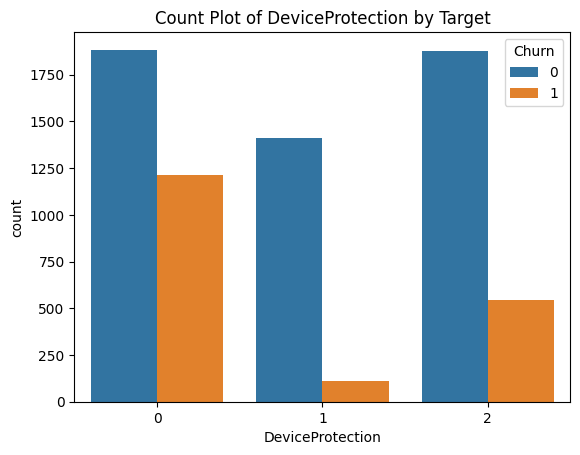

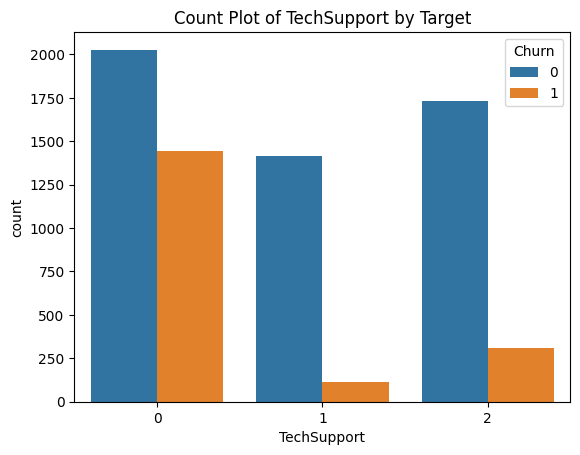

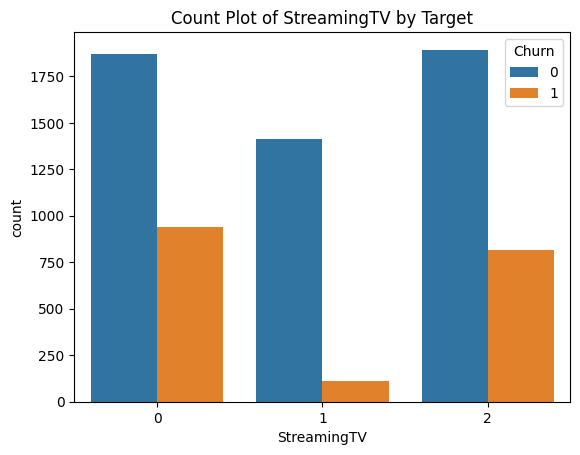

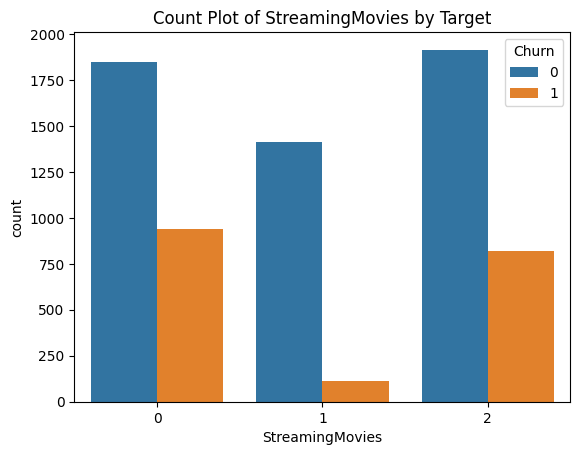

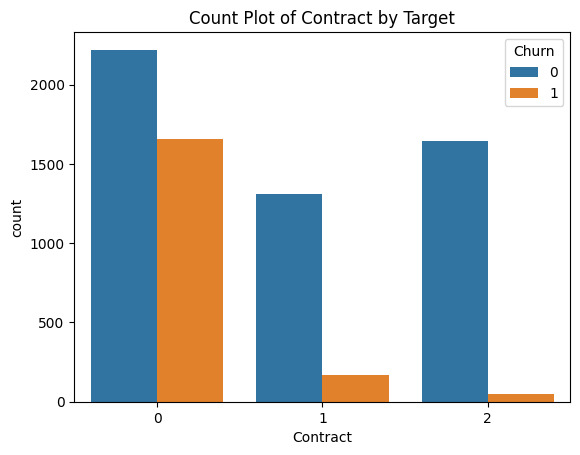

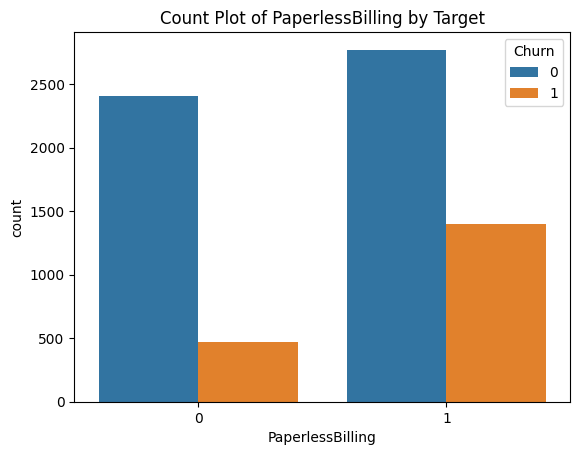

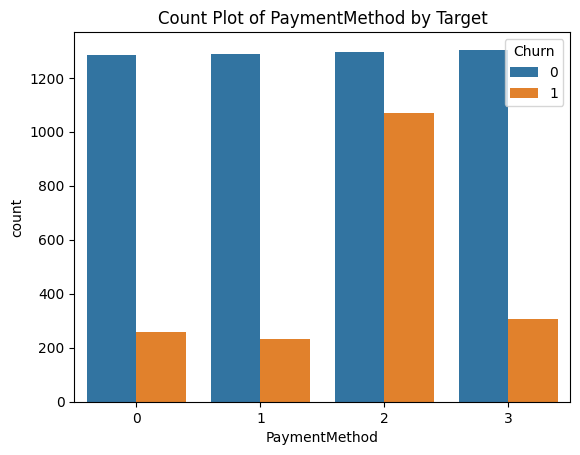

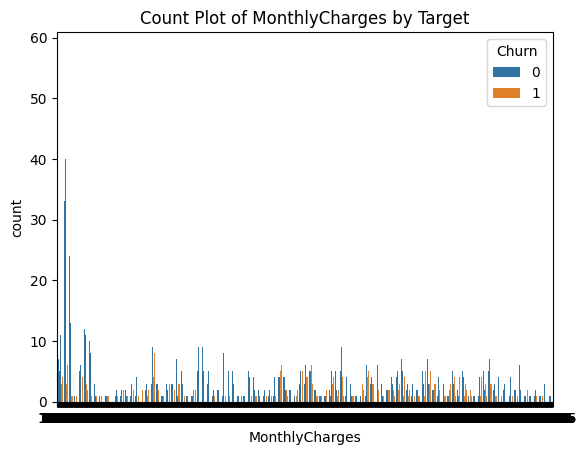

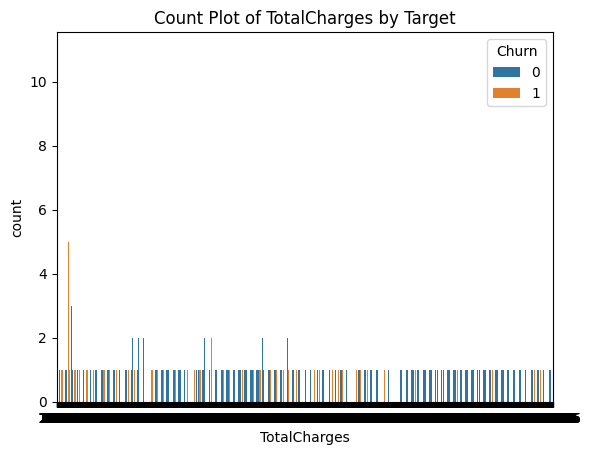

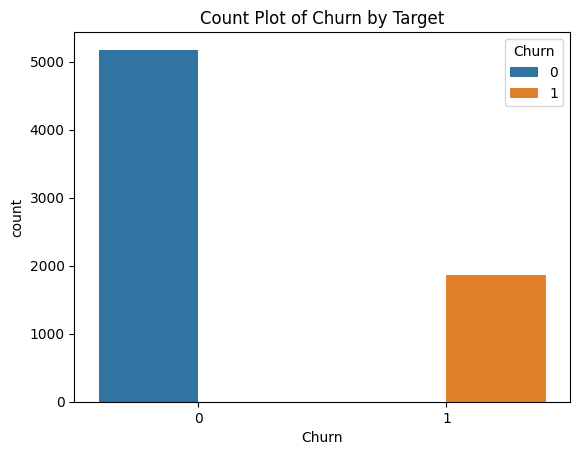

In [ ]:
for feature in selected_features:
    sns.countplot(data=customer_churn, x=feature, hue='Churn')
    plt.title(f'Count Plot of {feature} by Target')
    plt.show()

    # In the first distribution diagram the SeniorCitizen is less likely to churn
    # In the second distribution diagram the customers without partners are likely to churn more than customers with partners.
    # In the third distribution diagram customers with no Techsupport are likely to churn more than customers with internet services which are less likely to churn.



In [ ]:
# Split data into features (X) and target variable (y)
X = customer_churn[selected_features].drop('Churn', axis=1)
y = customer_churn['Churn']

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define the hidden layers
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(hidden_layer_1)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary_crossentropy for binary classification
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Epoch 1/10
159/159 [==============================] - 3s 10ms/step - loss: 0.4480 - accuracy: 0.7813 - val_loss: 0.4442 - val_accuracy: 0.7855
Epoch 2/10
159/159 [==============================] - 1s 6ms/step - loss: 0.4149 - accuracy: 0.8069 - val_loss: 0.4463 - val_accuracy: 0.7908
Epoch 3/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4073 - accuracy: 0.8112 - val_loss: 0.4520 - val_accuracy: 0.7819
Epoch 4/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4029 - accuracy: 0.8130 - val_loss: 0.4513 - val_accuracy: 0.7926
Epoch 5/10
159/159 [==============================] - 1s 4ms/step - loss: 0.3999 - accuracy: 0.8179 - val_loss: 0.4501 - val_accuracy: 0.7855
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8122 - val_loss: 0.4571 - val_accuracy: 0.7943
Epoch 7/10
159/159 [==============================] - 1s 4ms/step - loss: 0.3941 - accuracy: 0.8158 - val_loss: 0.4518 - val_accuracy: 0.7855
Epoch

In [ ]:
!pip install keras==2.12.0
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Define a function to create the model
def create_model(optimizer='adam', hidden_layer_1=128, hidden_layer_2=64):
    input_layer = Input(shape=(X_train_scaled.shape[1],))
    hidden_layer_1 = Dense(hidden_layer_1, activation='relu')(input_layer)
    hidden_layer_2 = Dense(hidden_layer_2, activation='relu')(hidden_layer_1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier with create_model function
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

# Define hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_layer_1': [64, 128, 256],
    'hidden_layer_2': [32, 64, 128]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and results
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best Accuracy: {grid_result.best_score_:.4f}')

# Evaluate the best model on the test data
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


<ipython-input-32-14a9bce349da>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, validation_split=0.1, verbose=0)


Best Parameters: {'hidden_layer_1': 64, 'hidden_layer_2': 64, 'optimizer': 'adam'}
Best Accuracy: 0.8032
45/45 [==============================] - 0s 2ms/step
Accuracy: 0.7878
ROC AUC: 0.7078


In [ ]:
from keras.models import save_model
# Save the scaler using joblib
joblib.dump(scaler, 'scaler.pkl')
best_model.model.save('best_model.h5')